# Prova 1

Aluno: Germano Barcelos dos Santos

Matrícula: EF3873

In [237]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('treinamento2.png')

In [30]:
img.shape

(600, 800, 3)

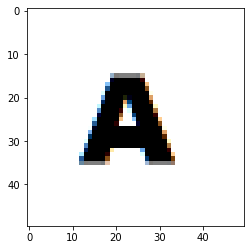

In [46]:
plt.imshow(img[0:50,0:50])

In [103]:
count=0

columns = [f"pixel{x}" for x in range(0, 50*50*3)]

df = []

for x in range(0, 600, 50):
    for y in range(0, 800, 50): 
        rows = list(img[0+x:x+50, 0+y:y+50].flatten())        
        df.append(rows)

    count+=1

In [104]:
df = pd.DataFrame.from_records(df).astype("uint8")
df.columns = columns

In [105]:
arr = np.array([["A" for x in range(32)], ["B" for x in range(32)], ["C" for x in range(32)], ["F" for x in range(32)], ["T" for x in range(32)], ["A" for x in range(32)]]).flatten()

In [106]:
arr

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

In [107]:
df["label"] = arr

In [108]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel7491,pixel7492,pixel7493,pixel7494,pixel7495,pixel7496,pixel7497,pixel7498,pixel7499,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
188,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
189,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A
190,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,A


In [110]:
df.to_csv("treinamento.csv", index=False)

# Treinamento

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns

In [200]:
df = pd.read_csv("treinamento.csv")

In [201]:
X = df.drop("label", axis=1)
Y = df["label"]

In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [203]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=0.95, copy=True, whiten=False)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)

[0.23082558 0.17633123 0.15438329 0.13197473 0.09915028 0.08450125
 0.05494414 0.04121692]


In [204]:
svc = svm.SVC(kernel="rbf", C = 1.0, gamma="auto")
svc.fit(X_train, Y_train.values.ravel())

SVC(gamma='auto')

In [205]:
y_train_prd = svc.predict(X_train)
y_test_prd = svc.predict(X_test)

In [206]:
acc_train_svc=accuracy_score(Y_train, y_train_prd)
acc_val_svc=accuracy_score(Y_test, y_test_prd)

print("accuracy on train set: {:.4f}\naccuracy on validation set: {:.4f}".format(acc_train_svc*100,acc_val_svc*100))

accuracy on train set: 100.0000
accuracy on validation set: 100.0000


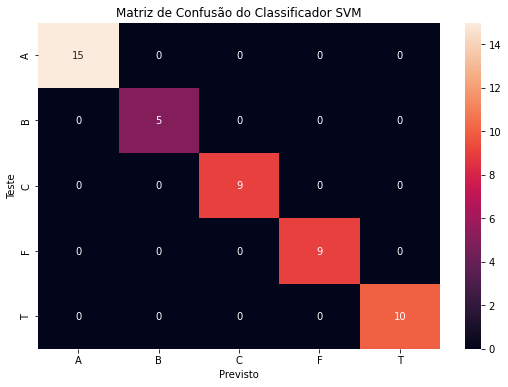

In [207]:
con_matrix = pd.crosstab(pd.Series(Y_test.values.flatten(), name='Teste' ),pd.Series(y_test_prd, name='Previsto'))
plt.figure(figsize = (9,6))
plt.title("Matriz de Confusão do Classificador SVM")
sns.heatmap(con_matrix, annot=True, fmt='g')
plt.show()

# Letras Vermelhas

In [127]:
img = cv2.imread('letrascriadas.png')

In [136]:
frame = img[0:50, 0:50]

In [141]:
frame = img[0:50, 0:50]

lower_red = np.array([0,0,0])
upper_red = np.array([50, 50, 255])

mask = cv2.inRange(frame, lower_red, upper_red)

res = cv2.bitwise_and(frame, frame, mask= mask)

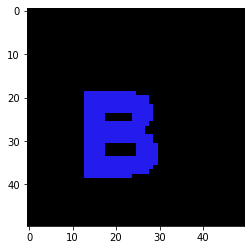

In [142]:
plt.imshow(res)

In [221]:
count=0

columns = [f"pixel{x}" for x in range(0, 50*50)] + ["index"]

df = []

count = 0

arr = np.array([["A" for x in range(32)], ["B" for x in range(32)], ["C" for x in range(32)], ["F" for x in range(32)], ["T" for x in range(32)], ["A" for x in range(32)]]).flatten()
count_imgs = 0 
for x in range(0, 600, 50):
    for y in range(0, 800, 50): 
        frame = img[0+x:x+50, 0+y:y+50]

        lower_red = np.array([0,0,0])
        upper_red = np.array([50, 50, 255])

        mask = cv2.inRange(frame, lower_red, upper_red)
        res = cv2.bitwise_and(frame, frame, mask = mask)
        gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        res_flatenned = list(gray.flatten())
        res_flatenned.append(count_imgs)

        # print(sum(res))
        if sum(res_flatenned) < 1000:
            count+=1
        else:
            rows = list(res_flatenned)        
            df.append(rows)
            # thresh = 127
            # im_bw = cv2.threshold(gray, , 255, cv2.THRESH_BINARY)[1]
            # plt.imshow(gray, cmap='gray')
            # plt.show()
        count_imgs+=1

print(f"{count} imagens são pretas")

142 imagens são pretas


In [222]:
df = pd.DataFrame.from_records(df).astype("uint8")
df.columns = columns

In [223]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [224]:
df["label"] = df["index"].apply(lambda x: arr[x])

In [225]:
df.drop("index", axis=1, inplace=True)

In [226]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [227]:
df.to_csv("treinamento_vermelhas.csv", index=False)

# Treinamento

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns

In [229]:
df = pd.read_csv("treinamento_vermelhas.csv")

In [230]:
X = df.drop("label", axis=1)
Y = df["label"]

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [232]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=0.95, copy=True, whiten=False)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)

[0.45075375 0.32775892 0.22148734]


In [233]:
svc = svm.SVC(kernel="linear", C = 1.0, gamma="auto")
svc.fit(X_train, Y_train.values.ravel())

SVC(gamma='auto', kernel='linear')

In [234]:
y_train_prd = svc.predict(X_train)
y_test_prd = svc.predict(X_test)

In [235]:
acc_train_svc=accuracy_score(Y_train, y_train_prd)
acc_val_svc=accuracy_score(Y_test, y_test_prd)

print("accuracy on train set: {:.4f}\naccuracy on validation set: {:.4f}".format(acc_train_svc*100,acc_val_svc*100))

accuracy on train set: 48.6486
accuracy on validation set: 23.0769


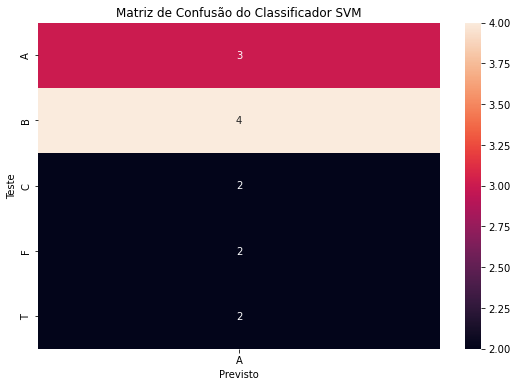

In [236]:
con_matrix = pd.crosstab(pd.Series(Y_test.values.flatten(), name='Teste' ),pd.Series(y_test_prd, name='Previsto'))
plt.figure(figsize = (9,6))
plt.title("Matriz de Confusão do Classificador SVM")
sns.heatmap(con_matrix, annot=True, fmt='g')
plt.show()